# <center>Maestría en Explotación de Datos y Descubrimiento del Conocimiento</center>
## <center>FCEN - UBA</center>
## <center>Curso de Nivelación de Algoritmos 2023</center>

### <center>Clase Práctica 5</center>

<p align="right"> <br>
Micaela Hirsch <br>
Tomás Palazzo <br>
Diego Onna<br>
Cecilia Bolaños</p>

## Ejercicios:


# Algoritmos Greedies

## El problema de la mochila

Un ladrón se encuentra robando el Banco Central. Decidió llevar consigo un bolso, que puede cargar como máximo N kgs. Dentro del banco hay M cajas con dólares, que no puede abrir sin que lo descubran. Cada caja tiene un peso (p[i]) y una ganancia (g[i]) asociados.

Dar un algoritmo greedy que le diga al ladrón que cajas debe poner en su mochila para maximizar sus ganancias, suponiendo que el ladrón **no** puede abrir las cajas.

In [14]:
elementos = [(5, 15), (3, 10), (3, 9), (1, 8), (3, 5.25)]
capacidad = 10

print(f"La caja {1} tiene peso {elementos[1][0]} y ganancia {elementos[1][1]}")

La caja 1 tiene peso 3 y ganancia 10


Hay distintas maneras de encarar este problema:
 - Probar todas las combinaciones (¡muy costoso!).
 - Priorizar el peso: para guardar la mayor cantidad de elementos, elegir siempre el de menor peso hasta cubrir el espacio de la mochila.
 - Priorizar la ganancia: elegir los elementos de mayor ganancia hasta quedarse sin espacio en la mochila.

#### Priorizar el peso

Un primer enfoque puede ser intentar guardar la mayor cantidad de elementos en el bolso. En nuestro algoritmo, esto se traducirá en *elegir siempre el elemento del menor peso*, hasta quedarse sin espacio en la mochila.

Primero, entonces, ordenaremos los elementos según el peso. Ya con los elementos ordenados podemos elegir qué guardar en el bolso.

In [15]:
elem_ordenados_peso = sorted(elementos, key=lambda x: x[0])
# Lo que está a la derecha del key indica que se ordena sólo por el primer elemento de cada tupla, el peso.

In [16]:
print(elem_ordenados_peso)

[(1, 8), (3, 10), (3, 9), (3, 5.25), (5, 15)]


Con los elementos ordenados, recorremos toda la lista hasta quedarnos sin capacidad.

In [20]:
espacio_bolso = 0
iter = 0
bolso = []

while espacio_bolso < capacidad and iter < len(elementos):
  elem = elem_ordenados_peso[iter]
  bolso.append(elem)
  espacio_bolso += elem[0] # 0: peso, actualizo el espacio cubierto en el bolso
  iter += 1

In [21]:
print('Elementos en el bolso:', bolso)
print('Ganancia obtenida: ', sum(x[1] for x in bolso))

Elementos en el bolso: [(1, 8), (3, 10), (3, 9), (3, 5.25)]
Ganancia obtenida:  32.25


¿Es la mejor ganancia que se puede obtener a partir de estos elementos?

¿Cuál es la complejidad de encarar de esta manera el problema?

#### Priorizar la ganancia

Otra manera de encarar este problema, similar a la anterior, es guardarse en el bolso los elementos de mayor ganancia, hasta quedarse sin lugar.

Esta es otra posibilidad de algoritmo Greedy, y la estructura del algoritmo es similar a la de antes.

In [22]:
elem_ordenados_ganancia = sorted(elementos, key=lambda x: x[1], reverse = True)
# En este caso ordenamos por la ganancia, por lo que la "key" cambia. El argumento "reverse" permite ordenar de mayor a menor.
print(elem_ordenados_ganancia)

[(5, 15), (3, 10), (3, 9), (1, 8), (3, 5.25)]


In [23]:
espacio_bolso = 0
iter = 0
bolso = []

while espacio_bolso < capacidad and iter < len(elementos):
  elem = elem_ordenados_ganancia[iter]
  if elem[0] <= (capacidad - espacio_bolso):
    bolso.append(elem)
    espacio_bolso += elem[0] # 0: peso, actualizo el espacio cubierto en el bolso
  iter += 1

In [24]:
print('Elementos en el bolso:', bolso)
print('Ganancia obtenida: ', sum(x[1] for x in bolso))

Elementos en el bolso: [(5, 15), (3, 10), (1, 8)]
Ganancia obtenida:  33


Priorizando la ganancia obtuvimos un mejor resultado. ¿Existe un mejor enfoque?

#### Priorizando la relación ganancia/peso

Una última opción puede ser calcular la relación $\frac{ganancia}{peso},$ y agregar en base a ello los elementos al bolso.

In [25]:
ratio_gp = list(map(lambda x: round(x[1]/x[0], 2), elementos))
ratio_gp

[3.0, 3.33, 3.0, 8.0, 1.75]

Con los ratios calculados, ordenamos los elementos y vamos eligiendo cual agregar a la mochila:

In [26]:
elem_con_ratio = [(elementos[i][0], elementos[i][1], ratio_gp[i]) for i in range(0, len(elementos))]
elem_con_ratio

[(5, 15, 3.0), (3, 10, 3.33), (3, 9, 3.0), (1, 8, 8.0), (3, 5.25, 1.75)]

In [27]:
elem_ordenados_ratio = sorted(elem_con_ratio, key=lambda x: x[2], reverse = True)
# En este caso ordenamos por el ratio, por lo que la "key" cambia. El argumento "reverse" permite ordenar de mayor a menor.
print(elem_ordenados_ratio)

[(1, 8, 8.0), (3, 10, 3.33), (5, 15, 3.0), (3, 9, 3.0), (3, 5.25, 1.75)]


In [28]:
espacio_bolso = 0
iter = 0
bolso = []

while espacio_bolso < capacidad and iter < len(elementos):
  elem = elem_ordenados_ratio[iter]
  if elem[0] <= (capacidad - espacio_bolso):
    bolso.append(elem)
    espacio_bolso += elem[0] # 0: peso, actualizo el espacio cubierto en el bolso
  iter += 1

In [29]:
print('Elementos en el bolso:', bolso)
print('Ganancia obtenida: ', sum(x[1] for x in bolso))

Elementos en el bolso: [(1, 8, 8.0), (3, 10, 3.33), (5, 15, 3.0)]
Ganancia obtenida:  33


¿Cuál fue la mejor ganancia que conseguimos para este ejemplo? ¿Cuál es la complejidad de nuestros algoritmos? ¿Existe un enfoque que siempre nos de la mejor solución?

## Suma Greedy

Para esta clase vamos a programar la solución del problema visto en la teórica.

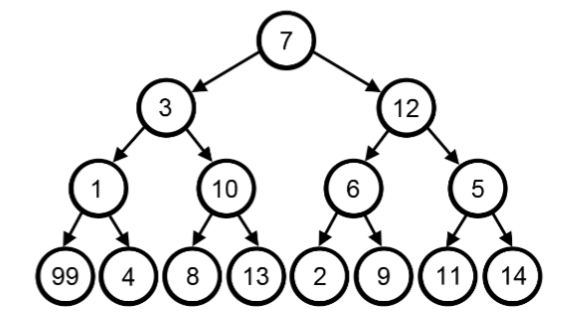

### Codigo de la clase Arbol

Un amigo nos dio un *binaryDic* y nos pidió que hagamos un algoritmo Greedy para que devolvamos la mayor suma posible arrancando desde la raíz.

In [30]:
# Definición de la clase NodoArbol
class NodoArbol:
    def __init__(self, x):
        self.val = x
        self.izquierda = None
        self.derecha = None

# Función para construir un árbol a partir de una lista de números
def construirArbol(nums):
    # Verificar si la lista está vacía
    if not nums:
        return None

    # Crear el nodo raíz con el primer número de la lista
    raiz = NodoArbol(nums[0])

    # Inicializar una cola para realizar el recorrido por niveles
    cola = [raiz]

    # Índice para recorrer la lista de números
    i = 1

    # Construir el árbol utilizando un recorrido por niveles
    while i < len(nums):
        # Obtener el nodo actual de la cola
        actual = cola.pop(0)

        # Agregar un nodo izquierdo si hay un número disponible en la lista
        if i < len(nums):
            actual.izquierda = NodoArbol(nums[i])
            cola.append(actual.izquierda)
            i += 1

        # Agregar un nodo derecho si hay un número disponible en la lista
        if i < len(nums):
            actual.derecha = NodoArbol(nums[i])
            cola.append(actual.derecha)
            i += 1

    # Devolver la raíz del árbol construido
    return raiz

# Función para imprimir un árbol en orden
def imprimirArbol(raiz):
    # Caso base: si la raíz es None, no hay nada que imprimir
    if not raiz:
        return

    # Imprimir el subárbol izquierdo
    imprimirArbol(raiz.izquierda)

    # Imprimir el valor del nodo actual
    print(raiz.val, end=" ")

    # Imprimir el subárbol derecho
    imprimirArbol(raiz.derecha)


### Resolucion

In [31]:
# Construimos el arbol
nums = [7,3,12,1,10,6,5,99,4,8,13,2,9,11,14]
raiz = construirArbol(nums)

def suma_greedy(nodo):
    # Si el nodo es vacio, sumo 0
    if nodo == None:
      return 0
    valor = nodo.val

    # El hijo favorito es el de valor mas grande
    hijo_fav = nodo.izquierda
    if not((nodo.izquierda == None) or (nodo.derecha == None)):
      if(nodo.izquierda.val < nodo.derecha.val):
        hijo_fav = nodo.derecha

    return suma_greedy(hijo_fav) + valor

In [32]:
print(suma_greedy(raiz))

34


## Ejercicios:


### Ejercicio 1
En un puesto de agua embotellada, cada botella de agua cuesta \$100.

Los clientes están formados en una fila para comprarte. Cada cliente comprará solo una botella de agua y pagará con un billete de \$200 o \$500.
Debes dar el cambio correcto a cada cliente, de modo que la transacción neta sea que el cliente pague \$100.

Ten en cuenta que al principio no tenés cambio en mano.

La función verdadero solo si puedes proporcionar a cada cliente el cambio correcto.

NOTA: La resolución Greedy contempla que es mejor dar vuelto primero con los billetes de \$200.

Ejemplos para probar el código:

a)

Entrada: [100,100,100,200,500]

Salida: verdadero

Explicación:

* De los primeros 3 clientes, recogemos tres billetes de \$100 en orden.
* Del cuarto cliente, recibimos un billete de \$200 y devolvemos un billete de \$100.
* Del quinto cliente, damos un billete de \$200 y dos billetes de \$100.
* Dado que todos los clientes recibieron el cambio correcto, la salida es verdadero.

b)

Entrada: [100,100,200,500]

Salida: falso

Explicación:

* De los dos primeros clientes en orden, recogemos dos billetes de \$100.
* Para al cliente siguientes, recibimos un billete de \$200 y devolvemos un billete de \$100.
* Para el último cliente, no podemos devolver cambio de \$500 porque solo tenemos un billete de \$100 y otro de \$200.
* Dado que no todos los clientes recibieron el cambio correcto, la respuesta es falso.

In [ ]:
# COMPLETAR
contador = {100:0, 200:0, 500:0}

def todos_compran(lista_billetes):

        for billete in lista_billetes:
            contador[billete] += 1
            vuelto = billete - 100
            if vuelto == 400:
                if contador[200] > 0: #Es greedy, porque 100 es más util que 200
                    if contador[200] > 1:
                      contador[200] -= 1
                      vuelto -= 200
                    contador[200] -= 1
                    vuelto -= 200
            contador[100] -= vuelto/100
            if contador[100] < 0:
                return False
        return True

In [ ]:
todos_compran([100,100,100,200,500])

True

In [ ]:
todos_compran([100,100,200,200,500])

True

### Ejercicio 2: Problema de la mochila fraccionaria

Un ladrón se encuentra robando el Banco Central. Decidió llevar consigo un bolso, que puede cargar como máximo N kgs. Dentro del banco hay M cajas con dólares, que no puede abrir sin que lo descubran. Cada caja tiene un peso (p[i]) y una ganancia (g[i]) asociados.

Dar un algoritmo greedy que le diga al ladrón que cajas debe poner en su mochila para maximizar sus ganancias, suponiendo que el ladrón **sí** puede abrir las cajas (y puede tomar una fracción de cada elemento).

In [ ]:
def fractionalKnapsack(W, arr): # Copiado de geeks and geeks pero es casi igual a lo de la clase

    # Sorting Item on basis of ratio
    arr.sort(key=lambda x: (x.profit/x.weight), reverse=True)

    # Result(value in Knapsack)
    finalvalue = 0.0

    # Looping through all Items
    for item in arr:

        # If adding Item won't overflow,
        # add it completely
        if item.weight <= W:
            W -= item.weight
            finalvalue += item.profit

        # If we can't add current Item,
        # add fractional part of it
        else:
            finalvalue += item.profit * W / item.weight
            break

    # Returning final value
    return finalvalue